In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
credit_data = pd.read_csv('credit_risk_dataset.csv')
credit_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
credit_data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [4]:
credit_data['person_emp_length'].fillna(credit_data['person_emp_length'].mode()[0], inplace=True)
credit_data['loan_int_rate'].fillna(credit_data['loan_int_rate'].median(), inplace=True)

In [5]:
credit_data_new = credit_data.copy()

In [6]:
credit_data_new.person_age.unique()

array([ 22,  21,  25,  23,  24,  26, 144, 123,  20,  32,  34,  29,  33,
        28,  35,  31,  27,  30,  36,  40,  50,  45,  37,  39,  44,  43,
        41,  46,  38,  47,  42,  48,  49,  58,  65,  51,  53,  66,  61,
        54,  57,  59,  62,  60,  55,  52,  64,  70,  78,  69,  56,  73,
        63,  94,  80,  84,  76,  67])

In [7]:
def age_limit(age):
    if 20 <= age <= 29:
        return '20+'
    if 30 <= age <= 39:
        return '30+'
    if 40 <= age <= 49:
        return '40+'
    if 50 <= age <= 59:
        return '50+'
    if 60 <= age <= 69:
        return '60+'
    if 70 <= age <= 79:
        return '70+'
    if 80 <= age <= 89:
        return '80+'
    if 90 <= age <= 99:
        return '90+'
    if age >=100 :
        return '100+'

In [8]:
credit_data_new.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

## Loan Status

Text(0.5, 1.0, 'Loan Status')

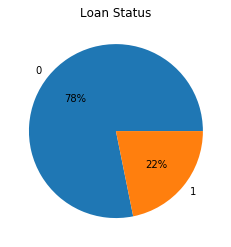

In [9]:
status_items = credit_data_new['loan_status'].values
status_unique, status_counts = np.unique(status_items, return_counts=True)
plt.pie(status_counts, labels = status_unique, autopct='%.0f%%')
plt.title('Loan Status')

In [10]:
credit_data_new.shape

(32581, 12)

In [11]:
person_age_area =[]
for i in range(len(credit_data_new)):
    person_age_area.append(age_limit(credit_data_new['person_age'].values[i]))
credit_data_new['person_age_limit'] = person_age_area

In [12]:
credit_data_new.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_age_limit
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,20+
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20+
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20+
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20+
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20+


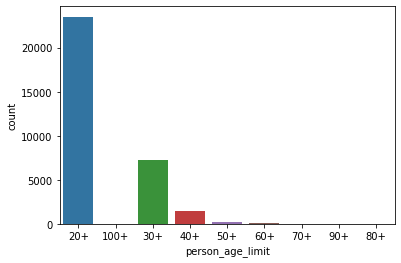

In [13]:
sns.countplot(x="person_age_limit", data=credit_data_new)

In [14]:
def income_class(income):
    if 0 < income <=32000:
        return 'Low'
    if 32000 < income <= 53000:
        return 'Lower-Middle Class'
    if 53000 < income <= 106000:
        return 'Middle Class'
    if 106000 < income <= 373000:
        return 'Upper-Middle Class'
    if 373000< income:
        return 'High class'

In [15]:
person_income_area =[]
for i in range(len(credit_data_new)):
    person_income_area.append(income_class(credit_data_new['person_income'].values[i]))
credit_data_new['person_income_limit'] = person_income_area

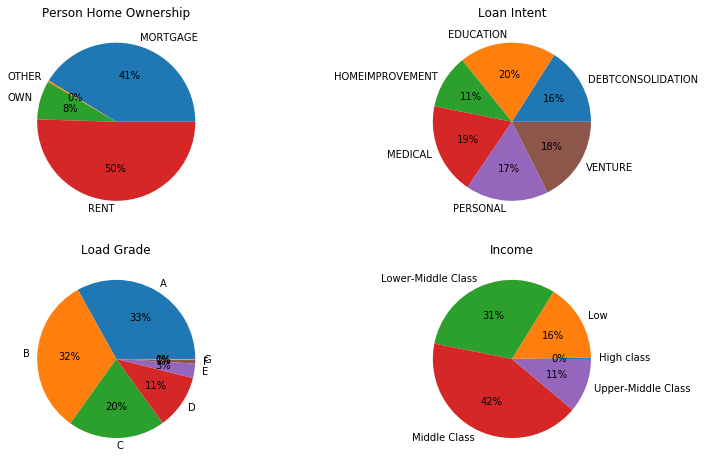

In [16]:
fig, axis = plt.subplots(2,2, figsize=(13, 8))

ph_items = credit_data_new["person_home_ownership"].values
ph_unique, ph_counts = np.unique(ph_items, return_counts=True)
axis[0, 0].pie(ph_counts, labels = ph_unique, autopct='%.0f%%')
axis[0, 0].title.set_text('Person Home Ownership')

intent_items = credit_data_new["loan_intent"].values
intent_unique, intent_counts = np.unique(intent_items, return_counts=True)
axis[0, 1].pie(intent_counts, labels = intent_unique, autopct='%.0f%%')
axis[0, 1].title.set_text('Loan Intent')

grade_items = credit_data_new["loan_grade"].values
grade_unique, grade_counts = np.unique(grade_items, return_counts=True)
axis[1, 0].pie(grade_counts, labels = grade_unique, autopct='%.0f%%')
axis[1, 0].title.set_text('Load Grade')

income_items = credit_data_new["person_income_limit"].values
income_unique, income_counts = np.unique(income_items, return_counts=True)
axis[1, 1].pie(income_counts, labels = income_unique, autopct='%.0f%%')
axis[1, 1].title.set_text('Income')

plt.show()

In [17]:
high_class_credit_data = credit_data_new[credit_data_new['person_income_limit']=='High class']

In [18]:
high_class_credit_data[high_class_credit_data['loan_grade']=='A'].head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_age_limit,person_income_limit
15911,24,425000,MORTGAGE,8.0,EDUCATION,A,10000,7.88,0,0.02,N,2,20+,High class
17541,24,425000,MORTGAGE,8.0,EDUCATION,A,10000,7.88,0,0.02,N,3,20+,High class
17833,32,1200000,MORTGAGE,1.0,VENTURE,A,12000,7.51,0,0.01,N,8,30+,High class
17857,33,400000,MORTGAGE,9.0,PERSONAL,A,15000,6.03,0,0.04,N,10,30+,High class
17858,31,400000,MORTGAGE,5.0,HOMEIMPROVEMENT,A,28000,7.49,0,0.07,N,6,30+,High class


In [19]:
high_class_credit_data[high_class_credit_data['loan_grade']=='E']

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_age_limit,person_income_limit
15915,26,480000,MORTGAGE,2.0,EDUCATION,E,25000,14.38,0,0.05,N,3,20+,High class
17840,35,648000,MORTGAGE,6.0,PERSONAL,E,10000,17.19,1,0.02,Y,8,30+,High class
27871,35,415000,MORTGAGE,2.0,HOMEIMPROVEMENT,E,15500,16.45,0,0.04,Y,10,30+,High class


## Credit Score by Loan Interest

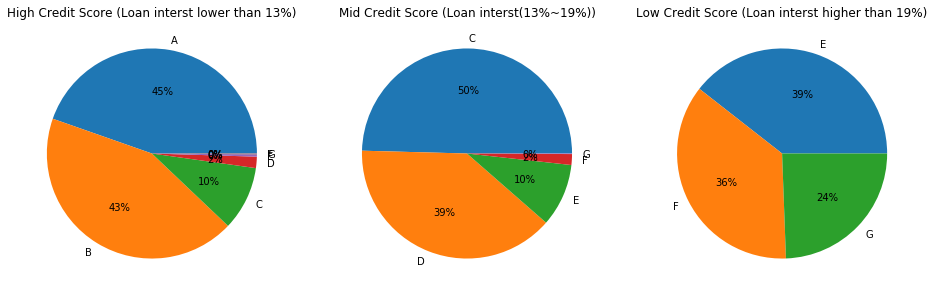

In [20]:
fig, axs = plt.subplots(1,3, figsize=(16, 8))

loan_interest_high_credit_data = credit_data_new[credit_data_new['loan_int_rate']<13]
loan_interest_high_credit_items = loan_interest_high_credit_data['loan_grade'].values
loan_interest_high_credit_unique, loan_interest_high_credit_counts = np.unique(loan_interest_high_credit_items, return_counts=True)
axs[0].pie(loan_interest_high_credit_counts, labels = loan_interest_high_credit_unique, autopct='%.0f%%')
axs[0].title.set_text('High Credit Score (Loan interst lower than 13%)')

loan_interest_mid_credit_data = credit_data_new[(credit_data_new['loan_int_rate']>13) &(credit_data_new['loan_int_rate']<19)]
loan_interest_mid_credit_items = loan_interest_mid_credit_data['loan_grade'].values
loan_interest_mid_credit_unique, loan_interest_mid_credit_counts = np.unique(loan_interest_mid_credit_items, return_counts=True)
axs[1].pie(loan_interest_mid_credit_counts, labels = loan_interest_mid_credit_unique, autopct='%.0f%%')
axs[1].title.set_text('Mid Credit Score (Loan interst(13%~19%))')

loan_interest_low_credit_data = credit_data_new[credit_data_new['loan_int_rate']>19]
loan_interest_low_credit_items = loan_interest_low_credit_data['loan_grade'].values
loan_interest_low_credit_unique, loan_interest_low_credit_counts = np.unique(loan_interest_low_credit_items, return_counts=True)
axs[2].pie(loan_interest_low_credit_counts, labels = loan_interest_low_credit_unique, autopct='%.0f%%')
axs[2].title.set_text('Low Credit Score (Loan interst higher than 19%)')

plt.show()

In [21]:
credit_data_new.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.658114,9589.371106,11.009620,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.159669,6322.086646,3.081611,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [22]:
income_categories = ['Low', 'Lower-Middle Class', 'Middle Class','Upper-Middle Class', 'High class']
credit_data_new['person_income_limit'] = pd.Categorical(credit_data_new['person_income_limit'], categories = income_categories)

In [23]:
income_data = credit_data_new.sort_values(by=['person_income_limit'])
income_data['person_income_limit'].unique()

['Low', 'Lower-Middle Class', 'Middle Class', 'Upper-Middle Class', 'High class']
Categories (5, object): ['Low', 'Lower-Middle Class', 'Middle Class', 'Upper-Middle Class', 'High class']

In [24]:
loan_grade_data = credit_data_new.sort_values(by=['loan_grade', 'person_income_limit'])
loan_grade_data['loan_grade'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

## Loan Grade by income

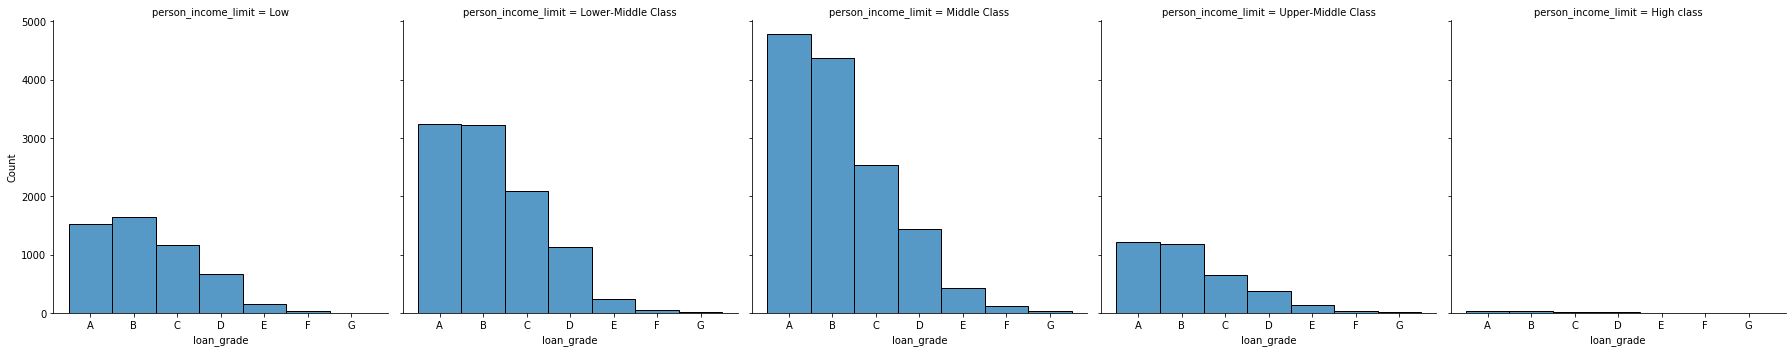

In [25]:
sns.displot(data=loan_grade_data, x="loan_grade", col="person_income_limit")

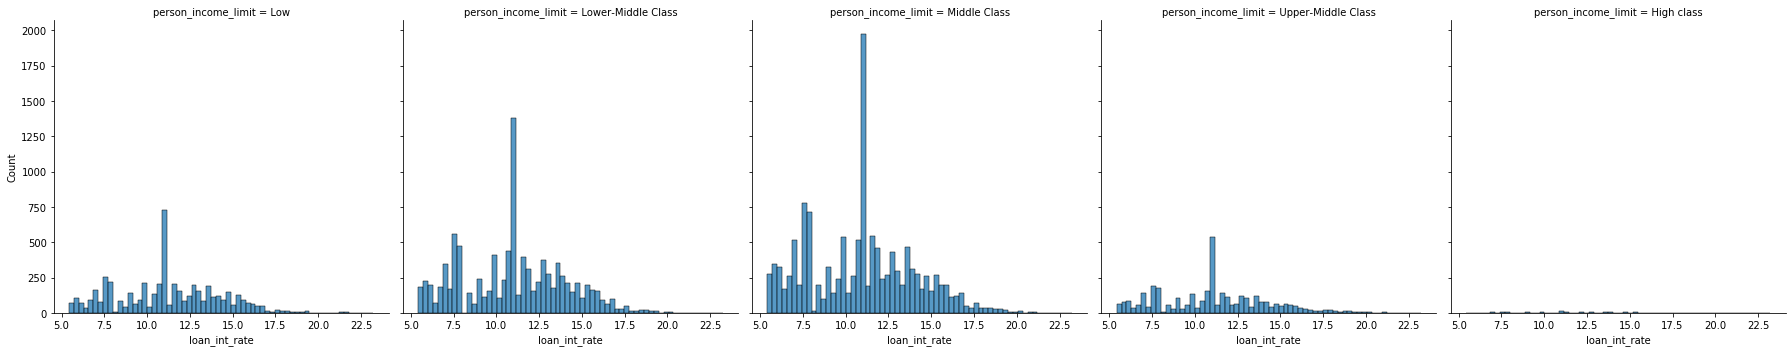

In [26]:
sns.displot(data=loan_grade_data, x="loan_int_rate", col="person_income_limit")

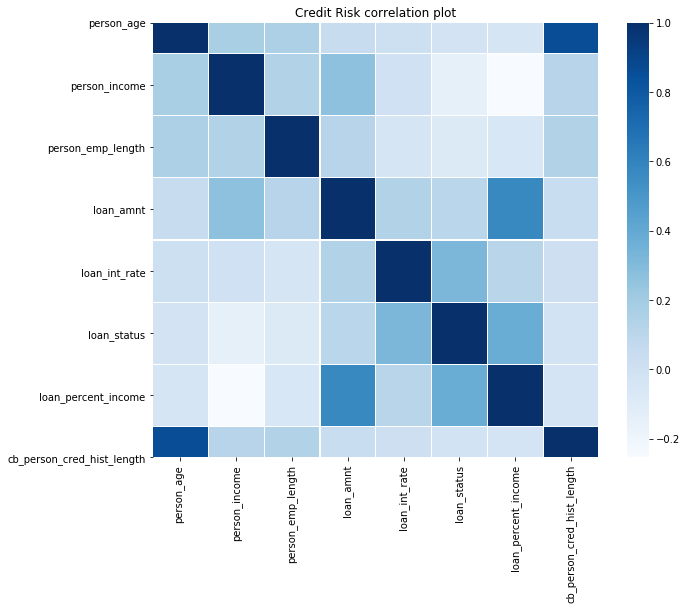

In [27]:
plt.figure(figsize = (10,8))
plt.title('Credit Risk correlation plot')
corr = credit_data_new.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues")
plt.show()

## Loan Grade by Loan Status

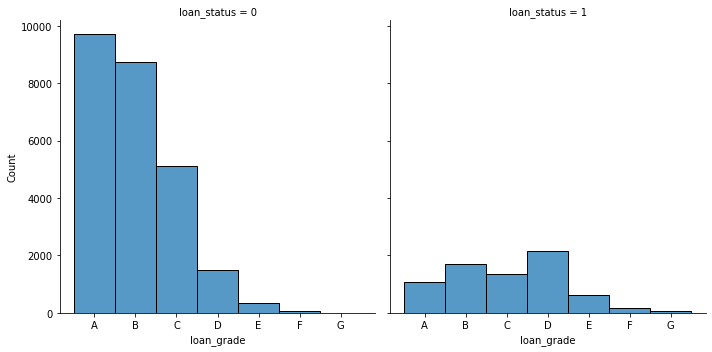

In [28]:
sns.displot(data=loan_grade_data, x="loan_grade", col="loan_status")

## Loan Grade by loan interest rate and loan percent income

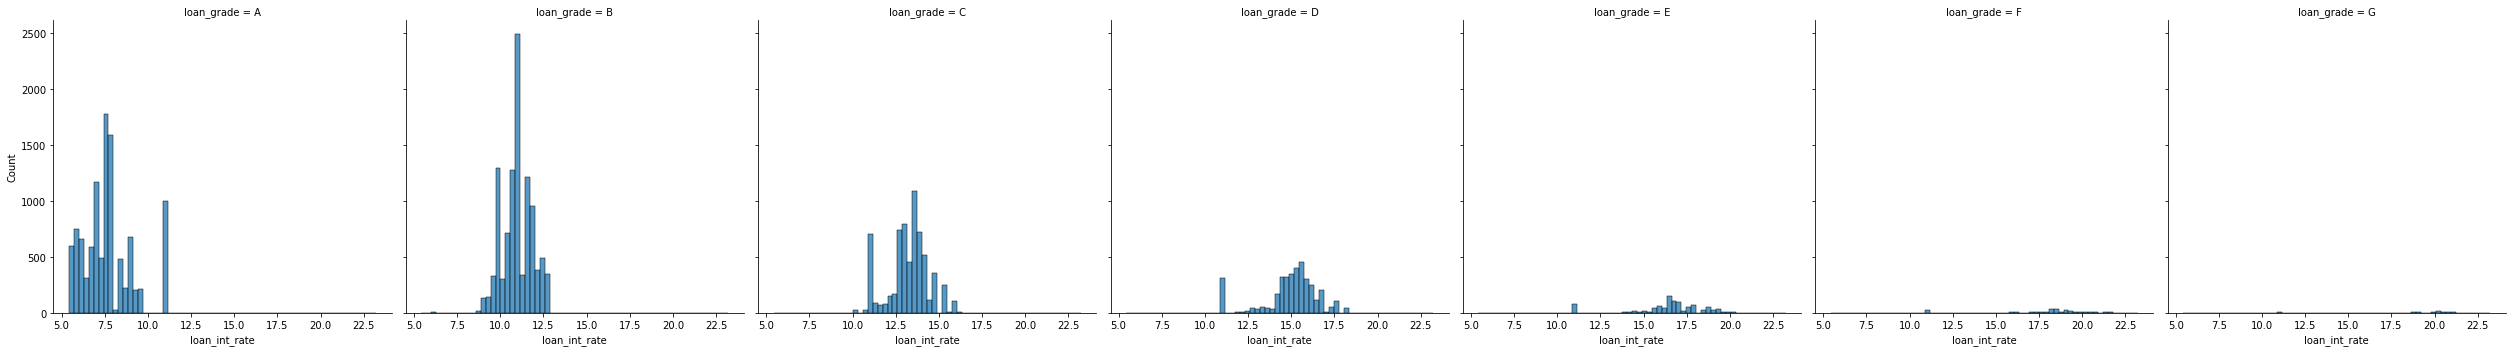

In [29]:
sns.displot(data=loan_grade_data, x="loan_int_rate", col="loan_grade")

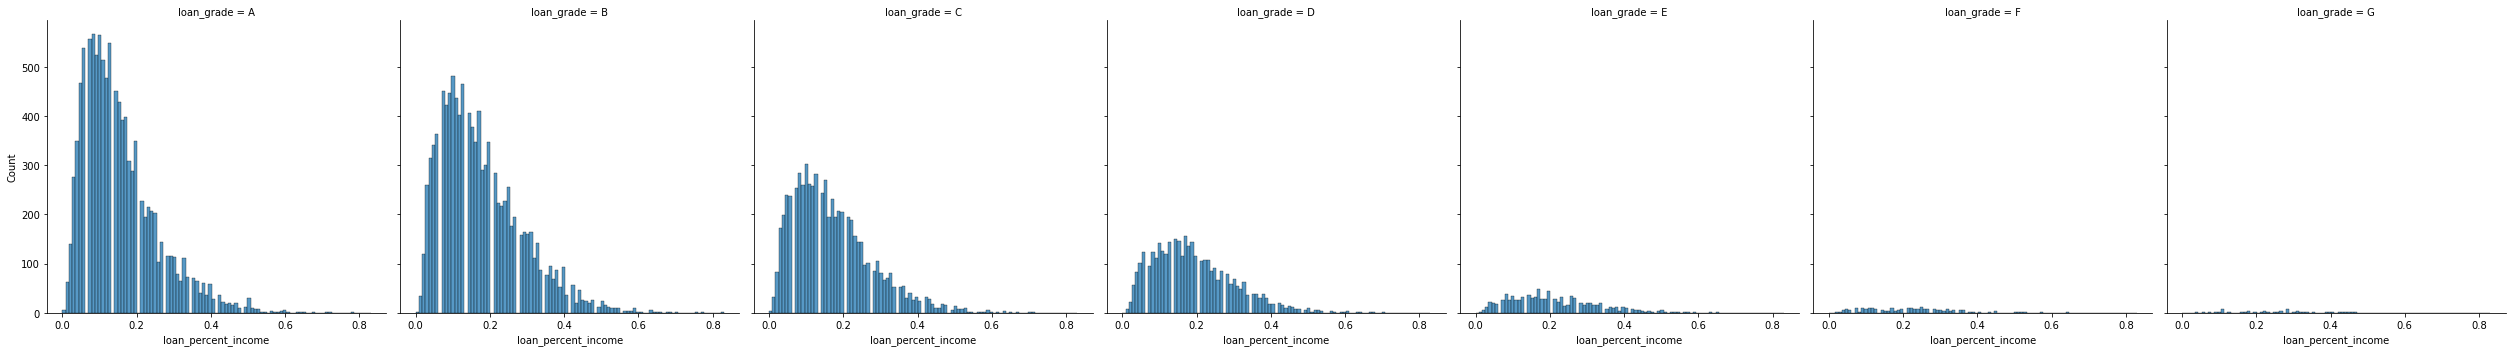

In [30]:
sns.displot(data=loan_grade_data, x="loan_percent_income", col="loan_grade")

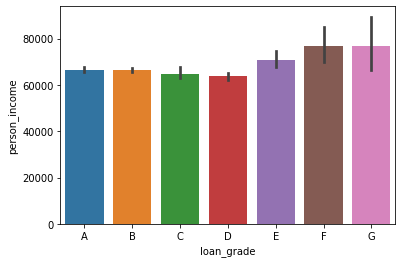

In [31]:
sns.barplot(x = loan_grade_data["loan_grade"], y = loan_grade_data['person_income'])

In [32]:
credit_data_new.head(1)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_age_limit,person_income_limit
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,20+,Middle Class


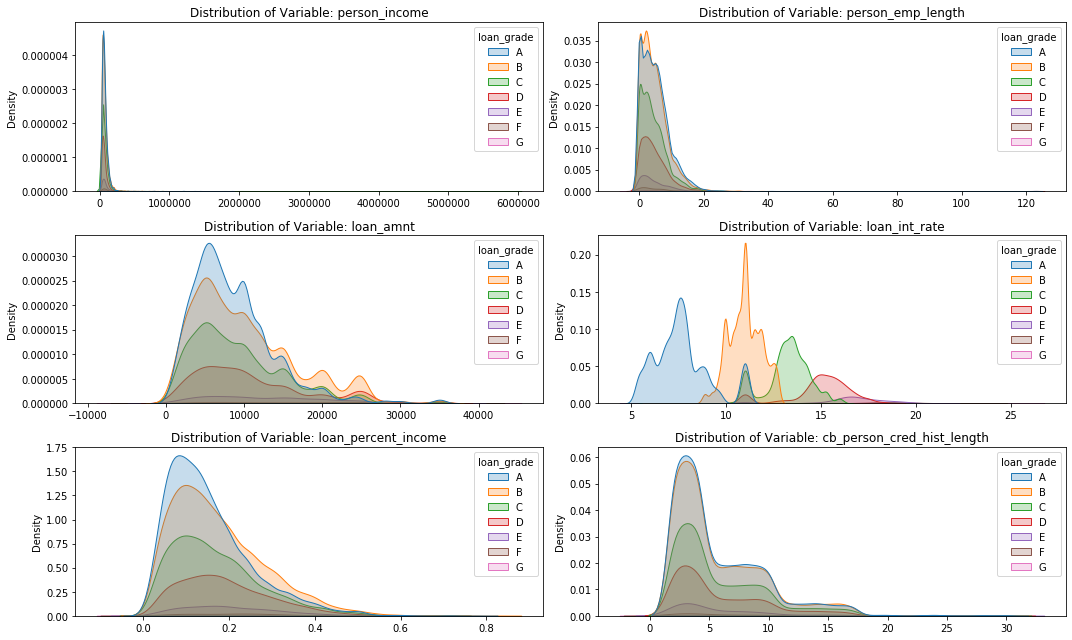

In [33]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9), sharex = False, sharey = False)
axes = axes.ravel()  
cols = ['person_income','person_emp_length', 'loan_amnt','loan_int_rate', 'loan_percent_income','cb_person_cred_hist_length']

for col, ax in zip(cols, axes):
    data = loan_grade_data
    sns.kdeplot(data=data, x=col, shade=True, ax=ax, hue='loan_grade')
    ax.set(title=f'Distribution of Variable: {col}', xlabel=None)
    
fig.tight_layout()
plt.show()

## Encoding

In [34]:
age_categories = ['20+', '30+', '40+', '50+', '60+', '70+', '80+',  '90+', '100+']
credit_data_new['person_age_limit'] = pd.Categorical(credit_data_new['person_age_limit'], categories = age_categories)
age_data = credit_data_new.sort_values(by=['person_age_limit'])
age_data['person_age_limit'].unique()

['20+', '30+', '40+', '50+', '60+', '70+', '80+', '90+', '100+']
Categories (9, object): ['20+', '30+', '40+', '50+', ..., '70+', '80+', '90+', '100+']

In [35]:
income_data['person_income_limit'].unique()

['Low', 'Lower-Middle Class', 'Middle Class', 'Upper-Middle Class', 'High class']
Categories (5, object): ['Low', 'Lower-Middle Class', 'Middle Class', 'Upper-Middle Class', 'High class']

In [36]:
loan_grade_data['loan_grade'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [37]:
age_dict={}
age_unique_list = list(age_data['person_age_limit'].unique())
for i in range(0, len(age_unique_list)):
    age_dict[age_unique_list[i]] = i
    
income_dict={}
income_unique_list = list(income_data['person_income_limit'].unique())
for i in range(0, len(income_unique_list)):
    income_dict[income_unique_list[i]] = i

loan_grade_dict={}
loan_grade_list = list(loan_grade_data['loan_grade'].unique())
for i in range(0, len(loan_grade_list)):
    loan_grade_dict[loan_grade_list[i]] = i

home_owner_dict={}
home_owner_list = list(credit_data_new['person_home_ownership'].unique())
for i in range(0, len(home_owner_list)):
    home_owner_dict[home_owner_list[i]] = i

loan_intent_dict={}
loan_intent_list = list(credit_data_new['loan_intent'].unique())
for i in range(0, len(loan_intent_list)):
    loan_intent_dict[loan_intent_list[i]] = i 
    
cb_default_dict={}
cb_default_list = list(credit_data_new['cb_person_default_on_file'].unique())
for i in range(0, len(cb_default_list)):
    cb_default_dict[cb_default_list[i]] = i 

In [38]:
print(age_dict)
print(income_dict)
print(loan_grade_dict)
print(home_owner_dict)
print(loan_intent_dict)
print(cb_default_dict)

{'20+': 0, '30+': 1, '40+': 2, '50+': 3, '60+': 4, '70+': 5, '80+': 6, '90+': 7, '100+': 8}
{'Low': 0, 'Lower-Middle Class': 1, 'Middle Class': 2, 'Upper-Middle Class': 3, 'High class': 4}
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
{'RENT': 0, 'OWN': 1, 'MORTGAGE': 2, 'OTHER': 3}
{'PERSONAL': 0, 'EDUCATION': 1, 'MEDICAL': 2, 'VENTURE': 3, 'HOMEIMPROVEMENT': 4, 'DEBTCONSOLIDATION': 5}
{'Y': 0, 'N': 1}


In [39]:
credit_data_new = credit_data_new.replace(age_dict)
credit_data_new = credit_data_new.replace(income_dict)
credit_data_new = credit_data_new.replace(loan_grade_dict)
credit_data_new = credit_data_new.replace(home_owner_dict)
credit_data_new = credit_data_new.replace(loan_intent_dict)
credit_data_new = credit_data_new.replace(cb_default_dict)

In [40]:
credit_data_new.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_age_limit,person_income_limit
0,22,59000,0,123.0,0,3,35000,16.02,1,0.59,0,3,0,2
1,21,9600,1,5.0,1,1,1000,11.14,0,0.10,1,2,0,0
2,25,9600,2,1.0,2,2,5500,12.87,1,0.57,1,3,0,0
3,23,65500,0,4.0,2,2,35000,15.23,1,0.53,1,2,0,2
4,24,54400,0,8.0,2,2,35000,14.27,1,0.55,0,4,0,2


In [41]:
credit_data_new2  = credit_data_new.drop(['person_age', 'person_income'],axis=1)
credit_data_new2.head()

,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_age_limit,person_income_limit
0,0,123.0,0,3,35000,16.02,1,0.59,0,3,0,2
1,1,5.0,1,1,1000,11.14,0,0.10,1,2,0,0
2,2,1.0,2,2,5500,12.87,1,0.57,1,3,0,0
3,0,4.0,2,2,35000,15.23,1,0.53,1,2,0,2
4,0,8.0,2,2,35000,14.27,1,0.55,0,4,0,2


In [42]:
credit_data_model = credit_data_new2.copy()

In [43]:
credit_data_model.head()

,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_age_limit,person_income_limit
0,0,123.0,0,3,35000,16.02,1,0.59,0,3,0,2
1,1,5.0,1,1,1000,11.14,0,0.10,1,2,0,0
2,2,1.0,2,2,5500,12.87,1,0.57,1,3,0,0
3,0,4.0,2,2,35000,15.23,1,0.53,1,2,0,2
4,0,8.0,2,2,35000,14.27,1,0.55,0,4,0,2


## Modeling

In [44]:
from sklearn.model_selection import train_test_split

X = credit_data_model[['person_home_ownership','person_emp_length', 'loan_intent', 'loan_grade', 
                     'loan_amnt','loan_int_rate','loan_percent_income','cb_person_default_on_file', 'cb_person_cred_hist_length',
                     'person_age_limit', 'person_income_limit']]
y = credit_data_model['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

In [45]:
print(X_train.shape, y_train.shape,X_test.shape,y_test.shape )

(22806, 11) (22806,) (9775, 11) (9775,)


## Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression()
model_log.fit(X_train,y_train)
pred_log=model_log.predict(X_test)
log_score =model_log.score(X_train,y_train)
log_pred_score =round(log_score*100,2)
print(log_pred_score)

82.35


## Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

model_decision=DecisionTreeClassifier()
model_decision.fit(X_train,y_train)
pred_decision=model_decision.predict(X_test)
decision_score =model_decision.score(X_train,y_train)
decision_pred_score =round(decision_score*100,2)
print(decision_pred_score)

100.0


## XGBoost

In [48]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, np.ravel(y_train))

predict_xgb = xgb_model.predict_proba(X_test)
predict_xgb_prob = pd.DataFrame(predict_xgb[:,1],columns = ['Default Probability'])
xgb_probability = pd.concat([predict_xgb_prob, y_test.reset_index(drop=True)],axis=1)
xgb_probability.head()

[17:00:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Default Probability,loan_status
0,0.085035,0
1,0.000081,0
2,0.983290,1
3,0.003394,0
4,0.004725,0


In [49]:
feat_importance = xgb_model.get_booster().get_score(importance_type='weight')
feature_importance_rank = dict(sorted(feat_importance.items(), key=lambda item: item[1]))
feature_importance_rank 

{'cb_person_default_on_file': 40.0,
 'person_age_limit': 58.0,
 'person_income_limit': 149.0,
 'loan_grade': 160.0,
 'person_home_ownership': 202.0,
 'cb_person_cred_hist_length': 319.0,
 'loan_intent': 336.0,
 'person_emp_length': 389.0,
 'loan_percent_income': 658.0,
 'loan_amnt': 693.0,
 'loan_int_rate': 738.0}

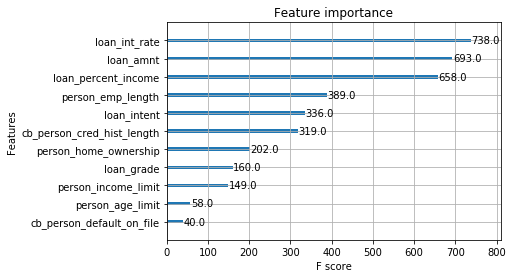

In [50]:
xgb.plot_importance(xgb_model,importance_type='weight')

In [51]:
pred_xgb=xgb_model.predict(X_test)
xgb_score =xgb_model.score(X_train,y_train)
xgb_pred_score =round(xgb_score*100,2)
print(xgb_pred_score)

95.07


# KNN Classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier()
model_knn.fit(X_train,y_train)
pred_knn=model_knn.predict(X_test)
knn_score =model_knn.score(X_train,y_train)
knn_pred_score =round(knn_score*100,2)
print(knn_pred_score)

85.41


## CatBoost

In [53]:
import catboost as cat

model_catboost = cat.CatBoostClassifier(iterations=10000,learning_rate=0.005,eval_metric='Recall')
model_catboost.fit(X_train,y_train, early_stopping_rounds=1000, verbose=1000)

0:	learn: 0.5488902	total: 98.4ms	remaining: 16m 24s
1000:	learn: 0.6846631	total: 5.42s	remaining: 48.8s
2000:	learn: 0.6976605	total: 10.3s	remaining: 41.1s
3000:	learn: 0.7044591	total: 15.1s	remaining: 35.2s
4000:	learn: 0.7140572	total: 19.8s	remaining: 29.8s
5000:	learn: 0.7202559	total: 24.7s	remaining: 24.7s
6000:	learn: 0.7276545	total: 29.6s	remaining: 19.7s
7000:	learn: 0.7328534	total: 34.5s	remaining: 14.8s
8000:	learn: 0.7400520	total: 39.4s	remaining: 9.84s
9000:	learn: 0.7444511	total: 44.2s	remaining: 4.91s
9999:	learn: 0.7504499	total: 49.1s	remaining: 0us


In [54]:
pred_catboost=model_catboost.predict(X_test)
catboost_score =model_catboost.score(X_test,y_test)
catboost_pred_score =round(catboost_score*100,2)
catboost_pred_score

93.37

## Classification Report

In [55]:
from sklearn.metrics import classification_report

print('Logistic Regression')
print(classification_report(y_test,pred_log))

print('Decision Tree')
print(classification_report(y_test,pred_decision))

print('XGBoost')
print(classification_report(y_test,pred_xgb))

print('KNN')
print(classification_report(y_test,pred_knn))

print('CatBoost')
print(classification_report(y_test,pred_catboost))

Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7668
           1       0.64      0.39      0.48      2107

    accuracy                           0.82      9775
   macro avg       0.74      0.66      0.69      9775
weighted avg       0.80      0.82      0.80      9775

Decision Tree
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      7668
           1       0.71      0.74      0.73      2107

    accuracy                           0.88      9775
   macro avg       0.82      0.83      0.82      9775
weighted avg       0.88      0.88      0.88      9775

XGBoost
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7668
           1       0.96      0.72      0.82      2107

    accuracy                           0.93      9775
   macro avg       0.94      0.85      0.89      9775
weighted avg       0.93      0.9

## ROC Curve

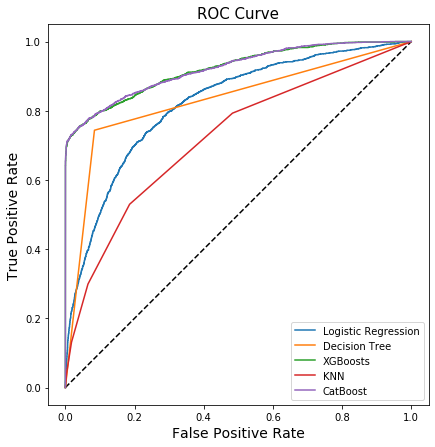

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(15,7))
plt.subplot(1,2,2)
plt.plot([0, 1], [0, 1], 'k--')

model_log_proba=model_log.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,model_log_proba)
plt.plot(fpr, tpr, label='Logistic Regression')

model_decision_proba=model_decision.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,model_decision_proba)
plt.plot(fpr, tpr, label='Decision Tree')

xgb_model_proba=xgb_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,xgb_model_proba)
plt.plot(fpr, tpr, label='XGBoosts')

model_knn_proba=model_knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,model_knn_proba)
plt.plot(fpr, tpr, label='KNN')

model_catboost_proba=model_catboost.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test,model_catboost_proba)
plt.plot(fpr, tpr, label='CatBoost')

plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC Curve',fontsize=15)
plt.legend()